<a href="https://colab.research.google.com/github/LagosJA/Mineria_de_Datos/blob/main/Notebook_PIA_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Corazón a Ritmo Sano**
Equipo 1

Grupo 002 Miércoles 7-10 PM

Integrantes:


*   1851448 Muñoz Barrientos Regina
*   1941592 Lagos Martinez José Alejandro
*   1793775 Rodriguez Guerrero Luisa Victoria
*   1849202 Dominguez Victorino Cesar Oswaldo


**CORAZÓN A RITMO SANO**

https://www.kaggle.com/ronitf/heart-disease-uci

 **Introducción.**

El corazón es uno de los órganos más importantes ya que bombea sangre y suministra oxígeno y nutrientes a todo el cuerpo. Como cumple con estas funciones tan cruciales su bienestar es de suma importancia. Según la OMS, las enfermedades cardiovasculares son actualmente la principal causa de fallecimiento en todo el mundo representando un 31% de todas las muertes registradas. Una herramienta que explore datos sobre la salud de un paciente y datos sobre su corazón podría ayudar a reducir el tiempo en el que a éste se le brinde un diagnóstico y así iniciar tratamiento correspondiente lo más pronto posible, incrementando sus posibilidades de recuperación e incluso prevenir la muerte.

**Descripción de los datos.**

Se cuenta con una base de datos de tipo .csv con 303 filas, cada fila contiene información real por paciente y contiene 14 columnas, las columnas son las siguientes:

*   **age:**  La edad del paciente en años.
*   **sex:** El sexo del paciente siendo 1 = hombre y  0 = mujer.
*   **cp:** el tipo de dolor en el pecho que experimenta el paciente: (Valor 1: angina típica, Valor 2: angina atípica, Valor 3: dolor no anginoso, Valor 0: asintomático).
*   **trestbps:** La presión sanguínea en mmHg tomada al momento de admisión al hospital.
*   **chol:** La medida de colesterol en mg/dl
*   **fbs:** “Fasting Blood Sugar” es decir el nivel de azúcar en la sangre de la persona en ayunas, si es mayor de 120 mg/dl se le asigna el valor de 1, de lo contrario se le asigna el valor de 0 (> 120 mg/dl, 1 = true; 0 = false).
*   **restecg:** Medición electrocardiográfica en reposo (0 = normal, 1 = con anomalía de la onda ST-T, 2 = muestra una probable o definitiva hipertrofia ventricular izquierda según los criterios de Estes)
*   **thalach:** El ritmo cardíaco máximo alcanzado por el paciente en latidos por minuto.
*   **exang:** Angina de pecho por ejercicio (1 = si se tiene el síntoma; 0 = no se tiene)
*   **oldpeak:** Depresión del ST inducida por el ejercicio en relación con el reposo.
*   **slope:** la pendiente del pico del segmento ST de ejercicio (Valor 1: pendiente ascendente, Valor 2: plano, Valor 3: pendiente descendente)
*   **ca:** El número de vasos principales (0-3)
*   **thal:** Un trastorno sanguíneo llamado talasemia (1 = normal; 2 = defecto fijo; 3 = defecto reversible)
*   **target:** El paciente tiene una enfermedad del corazón  (0 = no, 1 = si)

**Justificación del uso de datos.**

Debido a que en México y en el mundo, la cantidad de personas que fallecen a causa de una enfermedad del cardiovascular es enorme, hacer uso de datos para encontrar indicadores de mala salud del corazón es importante.
Dentro de la base de datos se encuentra información que puede ser de ayuda para la prevención de dichas enfermedades de corazón, como lo son la edad del paciente, el tipo de dolor de pecho, la presión sanguínea al momento de presentar dolor, si se pudo o no tratar la enfermedad presentada en un paciente, entre otros aspectos importantes. Además de esto, otro factor favorable que se notó al hacer uso de estos datos, es la importancia que tiene cada uno de ellos hacia el proyecto, su fácil entendimiento y manipulación,  y a su vez el impacto favorable que tendrá para el cumplimiento del objetivo principal.

Una gran oportunidad para crear un método de contingencia en caso de que un paciente presente alguno de estos síntomas junto con sus características, debido a la complejidad de diagnóstico de una enfermedad cardiaca cada dato presentado es importante en la contribución de la resolución del problema planteado. Como ya fue mencionado, debido al entendimiento que se logró de cada columna de datos, podemos manejarlos de una forma eficiente y que cumpla con lo que se busca lograr.

**Objetivo principal.**

Predecir el diagnóstico sobre la enfermedad de corazón según los resultados de los exámenes de salud y datos biométricos del paciente.

**Objetivos secundarios.**

*   Identificar datos de mayor influencia al momento de realizar un diagnóstico.
*   Encontrar si existen algún grupo de edad o sexo sea más propenso a presentar problemas cardiacos.


**Desarrollo de las herramientas.**



#### *Limpieza*

Primero se muestra la base de datos original.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from statsmodels.tools import add_constant
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
df = pd.read_csv("heart.csv")
df = pd.read_csv("heart.csv",encoding='utf8')
df.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


El primer cambio que se realizó fue renombrar las columnas para un entendimiento más claro.

In [2]:
df.columns = ['Edad','Sexo','DolorPecho','PresArtRep','Col','NivAzuAyu','Electro','MaxRitCard','Angina','MinElectro','Pendiente','NumVasSang','thal','Objetivo']
df.head()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Después se escaneó la base de datos en busca de datos nulos y se descubrio que no existía ninguno.

In [3]:
df.isnull().sum()

Edad          0
Sexo          0
DolorPecho    0
PresArtRep    0
Col           0
NivAzuAyu     0
Electro       0
MaxRitCard    0
Angina        0
MinElectro    0
Pendiente     0
NumVasSang    0
thal          0
Objetivo      0
dtype: int64

####*Estadística Básica de los Datos*

Vemos que no hay ningún dato nulo así que procedemos a la sección de Estadística.

In [4]:
df.describe()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Nótese que en la columna NumVasSang el máximo es 4 y que en la columna thal el mínimo es 0.

Según la descripción de los datos en Kaggle, la columna thal debe contener valores 1, 2 ó 3, por lo que el mínimo no debería ser cero.
De la misma forma para la columna NumVasSang, esta debe contener datos 0, 1, 2 ó 3, como el máximo es 4, significa que algo no está bien.

Se descubrieron estas inconformidades entre los datos, por lo que se investigó y se encontró que los datos fueron obtenidos de las bases de datos del hospital de Cleveland y comparando estas dos bases se descubrió que sí existían datos nulos en la original y en la utilizada habían sido llenados con otros valores por lo que se decidió eliminar las filas que contenían estos datos nulos.

Esta información se consiguió en este foro de discusión: [https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877](https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877)



In [5]:
df=df.drop(df[df['NumVasSang'] == 4].index)
df=df.drop(df[df['thal'] == 0].index)
df.describe()

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
count,296.000000,296.000000,296.000000,296.00000,296.000000,296.00000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.523649,0.679054,0.959459,131.60473,247.155405,0.14527,0.523649,149.560811,0.327703,1.059122,1.395270,0.679054,2.327703,0.540541
std,9.059471,0.467631,1.034184,17.72662,51.977011,0.35297,0.526692,22.970792,0.470171,1.166474,0.618235,0.939726,0.585743,0.499198
min,29.000000,0.000000,0.000000,94.00000,126.000000,0.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,0.000000,120.00000,211.000000,0.00000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.00000,242.500000,0.00000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.00000,275.250000,0.00000,1.000000,166.000000,1.000000,1.650000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.00000,564.000000,1.00000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [6]:
df.to_csv("/content/HeartLimpio.csv",index=False)

Se eliminaron y registros por los motivos anteriores. Entre los aspectos importantes a notar sobre la estadística de los datos es que la media y mediana de colesterol son mayores a 200 mg/dL. Un nivel normal de colesterol es entre 125 y 200 mg/dL. Es decir que la mayoría de los pacientes en el registro presentan un nivel alto de colesterol.

Como la columna de NivAzuAyu vale 1 si el nivel de azucar es alto y 0 si no, la media es la proporción de pacientes que si cumplen con la condición. En este caso solo 14.52% de los pacientes presentan un nivel de azucar mayor a 120 mg/dL.

Con la misma lógica, vemos que el 67.9% de los registros corresponden a pacientes del sexo masculino. Observamos 54% de los pacientes fueron diagnosticados con una enfermedad del corazón. Además la edad media de los pacientes es de 54.52 años.



####*Visualización*

Empezaremos con la proporción de pacientes diagnosticados con una enfermedad del corazón en la base de datos. Nos apoyaremos de una gráfica de pastel.

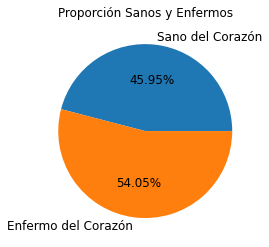

In [8]:
df_target = df.groupby("Objetivo").size()
plt.pie(df_target.values, labels = ["Sano del Corazón", "Enfermo del Corazón"], autopct='%1.2f%%', radius = 1, textprops = {"fontsize" : 12}) 
plt.title("Proporción Sanos y Enfermos")
plt.show()

En esta gráfica podemos ver que contamos con una proporción similar de registros para pacientes que fueron diagnosticados con una enfermedad del corazón y los que no. ¿Qué pasa si los separamos por sexo?

In [9]:
h=df.loc[df['Objetivo']==1,'Sexo'].value_counts()
m=df.loc[df['Objetivo']==0,'Sexo'].value_counts()
n=["Hombres","Mujeres"]
bd = pd.DataFrame({"Sexo":n, "Enfermos":h, "Sanos":m})
bd= bd.set_index("Sexo")
bd

,Enfermos,Sanos
Sexo,,
Hombres,89,112
Mujeres,71,24


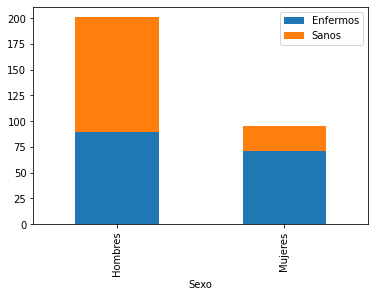

In [10]:
bd.plot.bar(stacked=True)

Separando los pacientes por su sexo y su diagnóstico obtenemos más información. Hay muchas más mujeres que fueron diagnosticadas con enfermedades del corazón en comparación a las que no. En el caso de los hombres, hay más sanos que enfermos. También vemos que hay aproximadamente el doble de pacientes masculinos a comparación a los del sexo femenino.

Viendo esta relación entre el sexo y el diagnóstico, ¿cómo afectará la edad al diagnóstico?

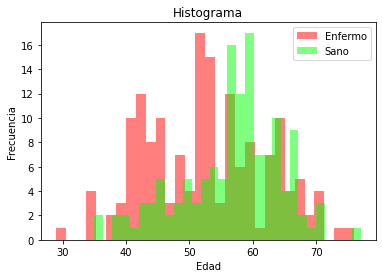

In [11]:
m = plt.hist(df[df["Objetivo"] == 1].Edad,bins=30,fc = (1,0,0,0.5),label = "Enfermo")
b = plt.hist(df[df["Objetivo"] == 0].Edad,bins=30,fc = (0,1,0,0.5),label = "Sano")
plt.legend()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

A diferencia de lo que se esperaría, la disribución de frecuencia de los pacientes diagnosticados con enfermedades del corazón está a la izquierda de los pacientes sanos del corazón. Esto idica que en general los pacientes que son diagnosticados con una enfermedad del corazón tienden a ser más jóvenes que los sanos. Después de ver como el sexo y la edad afectan al diagnóstico, ¿qué informacón nos pueden dar los indicadores de salud sobre el diagnóstico?


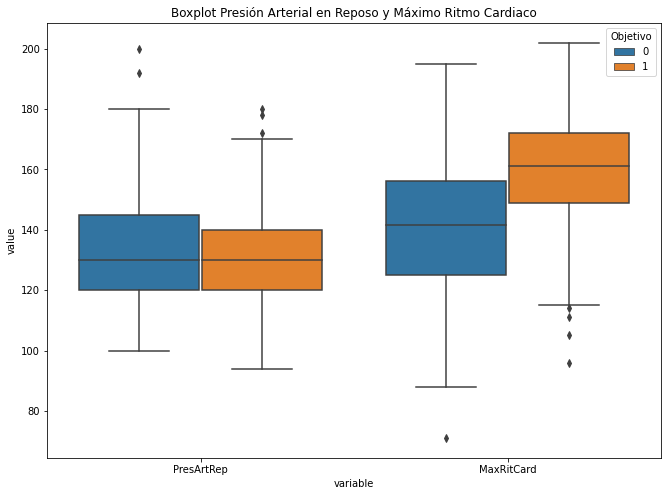

In [12]:
mdata = pd.melt(df,id_vars = "Objetivo",value_vars = ['PresArtRep', 'MaxRitCard'])
plt.figure(figsize = (11,8))
sns.boxplot(x = "variable", y = "value", hue="Objetivo",data= mdata)
plt.title("Boxplot Presión Arterial en Reposo y Máximo Ritmo Cardiaco")
plt.show()

Vemos que los pacientes que no fueron diagnosticados con una enfermedad del corazón tienden a mostrar mayor presión arterial en reposo pero un máximo ritmo cardiaco más bajo. 

In [48]:
df[(df['PresArtRep']>180) & (df['Objetivo']==0)]

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


In [51]:
df[(df['PresArtRep']>170) & (df['Objetivo']==1)]

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1


A edades avanzadas es normal presentar niveles de presión arterial más altos en comparación a jóvenes. Incluso hay casos como estos en los que se presentan valores un poco alejados de la media.

In [53]:
df[(df['MaxRitCard']<80) & (df['Objetivo']==0)]

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [55]:
df[(df['MaxRitCard']<115) & (df['Objetivo']==1)]

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal,Objetivo
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
95,53,1,0,142,226,0,0,111,1,0.0,2,0,3,1
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1
139,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1


Para los pacientes que fueron diagnosticados con enfermedades del corazón, las observaciones atípicas para MaxRitCard son muy bajas en comparación a la media. Lo normal es que los pacientes con enfermedad del corazón presenten mayor MaxRitCard que los que no fueron diagnosticados, por lo que estos outliers podrían afectar el desempeño del modelo seleccionado.

Otro indicador que es comunmente pensamos asociado con enfermedades del corazón es el nivel de colesterol.

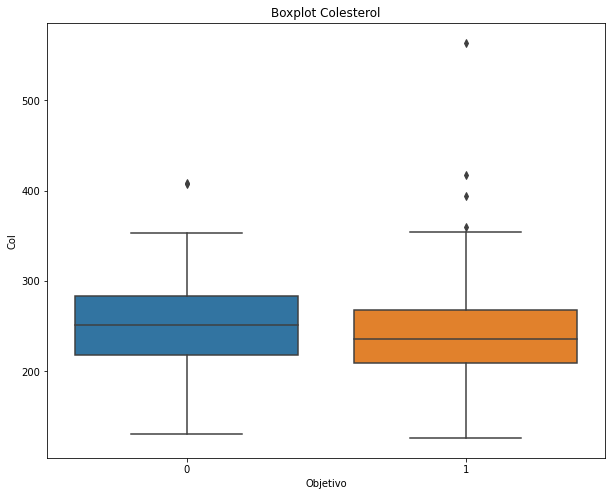

In [14]:
plt.figure(figsize = (10,8))
sns.boxplot(y='Col',x='Objetivo',data=df)
plt.title("Boxplot Colesterol")
plt.show()

Se decidió revisar el colesterol por separado de la presión arterial y máximo ritmo cardiaco por temas de escala. Sorprendente el diagrama de caja de los pacientes sanos es muy similar al de aquellos que fueron diagnosticados con enfermedades del corazón, lo que nos hace inferir que el colesterol alto no afecta significativamente al diagnóstico del corazón del paciente. Como no se observa una diferencia significativa entre la distribución de los datos para los pacientes con enfermedad del corazón y los sanos, no se espera que los datos atípicos del colesterol afecten significativamente el análisis.



In [15]:
h=df.loc[df['Objetivo']==1,'NumVasSang'].value_counts()
m=df.loc[df['Objetivo']==0,'NumVasSang'].value_counts()
n=[0,1,2,3]
bd = pd.DataFrame({"Numero Vasos Sanguineos":n, "Enfermos":h, "Sanos":m})
bd= bd.set_index("Numero Vasos Sanguineos")
bd

,Enfermos,Sanos
Numero Vasos Sanguineos,,
0,129,44
1,21,44
2,7,31
3,3,17


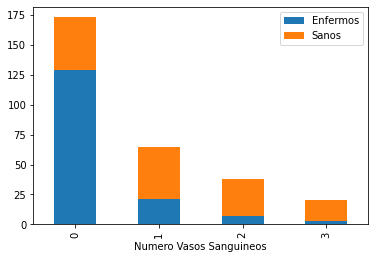

In [16]:
bd.plot.bar(stacked=True)

El resultado de una fluorscopia revela cuantos vasos sanguíneos son visbles en el paciente. Si se observan pocos o ningun vaso sanguíneo esto puede indicar coágulos o mala circulación.

Observamos que entre menor es número de vasos sanguíneos observados, mayor es la frecuencia con la que se presentan pacientes diagnosticados con enfermedad del corazón.

Para concluir desde una perspectiva más genralizada realizaremos un correlograma para ver de qué forma las variables afectan a la columna objetivo.

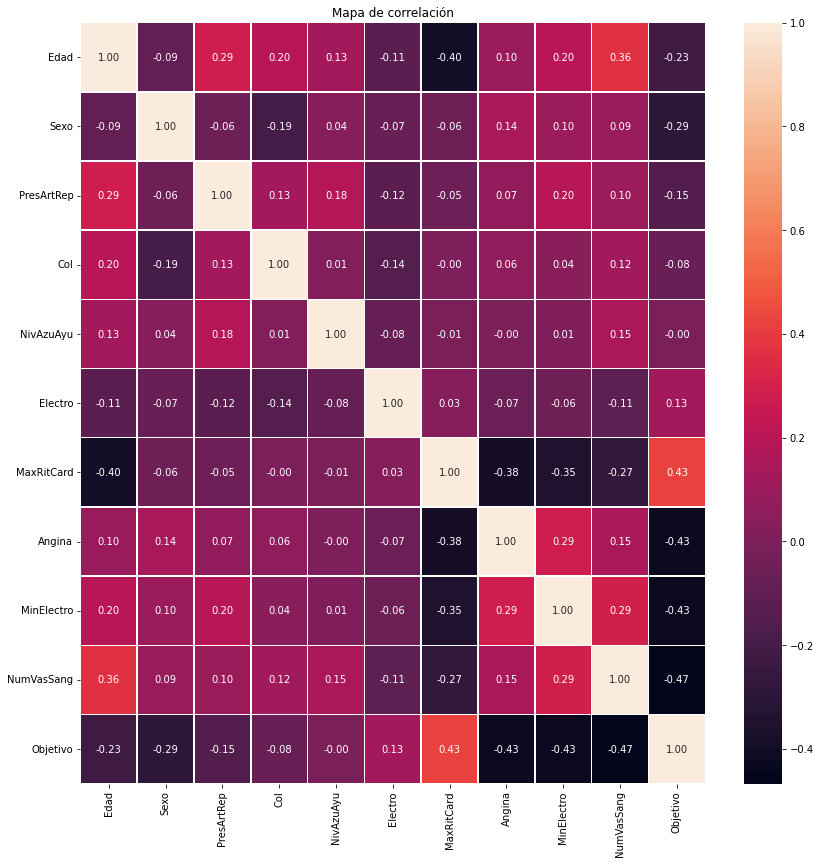

In [17]:
df0=df.drop("DolorPecho",axis=1)
df0=df0.drop("thal",axis=1)
df0=df0.drop("Pendiente",axis=1) #Eliminamos las variables categoricas no binarias
f,ax=plt.subplots(figsize = (14,14))
sns.heatmap(df0.corr(),annot= True,linewidths=0.5,fmt = ".2f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.show()

Del correlograma podemos obtener conclusiones similares a las que nos brindaban las gráficas anteriores. La edad y el sexo se correlacionan de manera negativa al diagnostico. Es decir los hombres son menos propensos a ser diagnosticados con enfermedades del corazón en comparación a las mujeres y los pacientes mayores son diagnosticados con enfermades del corazón con menor frecuencia (objetivo secundario).

La correlación entre el diagnósitco y el colesterol es muy cercana a cero, es decir, no están correlacionados de manera significativa. La columna Angina indica si el paciente presenta dolor de pecho al hacer ejercicio. Esperaríamos que este fuera un indicador para el diagnóstico pero se correlaciona de forma negativa, lo que indica lo contrario.

En conclusión, después de analizar las variables y cómo se relacionan a la columna de interés Objetivo, la evidencia apunta a que la variable con mayor influencia al momento de realizar el diagnóstico es el número de vasos sanguíneos observados en una fluorscopia (objetivo secundario). Otras variables que muestran alta correlación son máximo ritmo cardiaco, angina y Depresión del ST inducida por el ejercicio (MinElectro). 

Como el objetivo principal es encontrar un modelo que pueda predecir el diagnóstico a partir de los datos del paciente, el equipo se interesa por temas como Regresión Logística, Árbol de decisión y Máquina de Soporte Vectorial.



####*Técnicas de Minería*

#####Regresión Logística

Lo primero que hacemos, y nos va a servir para todas las técnicas, es separar la variable objetivo de las que usaremos para modelar. Además se van a crear los modelos con el 80% de los datos y usaremos el otro 20% para hacer una prueba.

In [18]:
X = df.drop(['Objetivo'],axis=1) 
y = df['Objetivo'] 

Aquí hacemos el split, las variables train son con las que entrenaremos al modelo y usaremos los perfiles test para comparar la predicción del modelo con el resultado real.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)

Como este es un modelo de regresión, debemos agregar el término connstante.

In [20]:
model = LogisticRegression(solver='liblinear')
X_train = add_constant(X_train)

Con `.fit` obtenemos el modelo.

In [21]:
model.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Con `.predict` podemos ver las predicciones que hace el modelo de regresión logística.

In [22]:
train_pred = model.predict(X_train)
train_pred

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0])

El training score es el ajuste del modelo.

In [23]:
Training_score = accuracy_score(train_pred,y_train) 
print("LR Accuracy Training Score: {:.2f}%".format(Training_score*100))

LR Accuracy Training Score: 86.86%


In [24]:
X_train = add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.330387
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Objetivo   No. Observations:                  236
Model:                          Logit   Df Residuals:                      222
Method:                           MLE   Df Model:                           13
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5225
Time:                        21:55:25   Log-Likelihood:                -77.971
converged:                       True   LL-Null:                       -163.28
Covariance Type:            nonrobust   LLR p-value:                 1.386e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7438      2.894      0.948      0.343      -2.928       8.415
Edad           0.0059      0.

Podemos realizar predicciones para el conjunto que no se usó para entrenar al modelo.

In [26]:
test_pred = model.predict(add_constant(X_test))
test_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0])

Ahora obtenemos el accuracy score de los resultados reales vs los resultados del modelo.

In [27]:
Test_score = accuracy_score(test_pred,y_test) 
print("LR Accuracy Test Score: {:.2f}%".format(Test_score*100))

LR Accuracy Test Score: 88.33%


En general vemos que tanto los datos con los que se construyó el modelo y los que se usaron para test, tienen buen ajuste.

El p-valor de 1.386e-29 es menor a alfa=0.05. Podemos decir que con 95% de confianza, la regresión es significativa.

De la tabla resumen vemos que el intervalo de confianza de la const contiene al 0, lo que es un indicio de regresión al origen. En general, los modelos de regresión tienden a mejorar su ajuste.

**Regresión al Origen, es decir cte=0.**

Realizamos los mismos pasos que para la regresión anterior, esta vez excluyendo el `add_constant`.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())
test_pred = model.predict(X_test)
Training_score = accuracy_score(train_pred,y_train) 
print("LR Accuracy Training Score: {:.2f}%".format(Training_score*100))
Test_score = accuracy_score(test_pred,y_test) 
print("LR Accuracy Test Score: {:.2f}%".format(Test_score*100))

Optimization terminated successfully.
         Current function value: 0.332312
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Objetivo   No. Observations:                  236
Model:                          Logit   Df Residuals:                      223
Method:                           MLE   Df Model:                           12
Date:                Wed, 20 Oct 2021   Pseudo R-squ.:                  0.5197
Time:                        21:56:17   Log-Likelihood:                -78.426
converged:                       True   LL-Null:                       -163.28
Covariance Type:            nonrobust   LLR p-value:                 5.489e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Edad           0.0200      0.022      0.907      0.364      -0.023       0.063
Sexo          -1.2468      0.

Vemos que el ajuste del modelo, tanto como el accuracy score para los datos test permanecen igual que en la regresión anterior.

Como no hubo mejoras es indiferente cual modelo elegimos. Para regresión al orgien el p-valor=5.489e-30 por lo que también podemos concluir con un 95% de confianza que la regresión es significativa.

Nos quedaremos con el modelo que tiene regresión al origen.

Como el ajuste es mayor a 80% decimos que es un buen modelo. La ecuación del modelo es la siguiente. Aquí (p/1-p) se conoce como "odd ratio". Cuando el logaritmo del "odd ratio" es positivo, la probabilidad de éxtito (enfermdad del corazón) es mayor a 50%. Y ese perfil se clasifica como Objetivo=1 es decir padece enfermedad del corazón

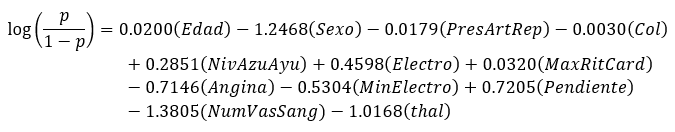

El coeficiente de sexo es negativo, lo que indica que cuando el paciente es hombre (Sexo=1) el log(p/1-p) decrece por lo que es más probable que sea negativo y el diagnóstico sea 0. Es decir que las mujeres son más propensas a ser diagnosticadas con enfermedades del corazón.

Lo mismo ocurre con el coeficiente de NumVasSang, como este es negativo entre más vasos sanguíneos sean visibles menor es la expresión log(p/1-p), y si log(p/1-p) es negativo esto significa que el diagnostico es 0. Es decir que entre menos vasos sanguíneos son visibles en el paciente, mayor es la probabilidad de que este padezca de una enfermedad del corazón.

#####Árbol de Decisión

La programación para este modelo es más sencilla ya que en la técnica anterior hicimos el split.

In [29]:
dtc = DecisionTreeClassifier( max_depth=3, min_samples_leaf=2)
dtc.fit(X_train, y_train)

print("Decision Tree Train Accuracy {:.2f}%".format(dtc.score(X_train, y_train)*100))
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))

Decision Tree Train Accuracy 86.44%
Decision Tree Test Accuracy 80.00%


Imprimimos algunos perfiles que se usaron para test y sus respectivas predicciones por si queremos trazar el camino que seguimos al utilizar el árbol de decisión.

In [30]:
X_test.head(10)

,Edad,Sexo,DolorPecho,PresArtRep,Col,NivAzuAyu,Electro,MaxRitCard,Angina,MinElectro,Pendiente,NumVasSang,thal
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
187,54,1,0,124,266,0,0,109,1,2.2,1,1,3
185,44,1,0,112,290,0,0,153,0,0.0,2,1,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
143,67,0,0,106,223,0,1,142,0,0.3,2,2,2


In [32]:
preds=dtc.predict(X_test)
preds

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

Ahora visualicemos el árbol de decisión.

In [33]:
export_graphviz(dtc, 'tree1.dot', filled=True, feature_names=X_train.columns, rounded=True)
!dot -Tpng 'tree1.dot' -o  'tree1.png'
!ls

heart.csv  HeartLimpio.csv  sample_data  tree1.dot  tree1.png


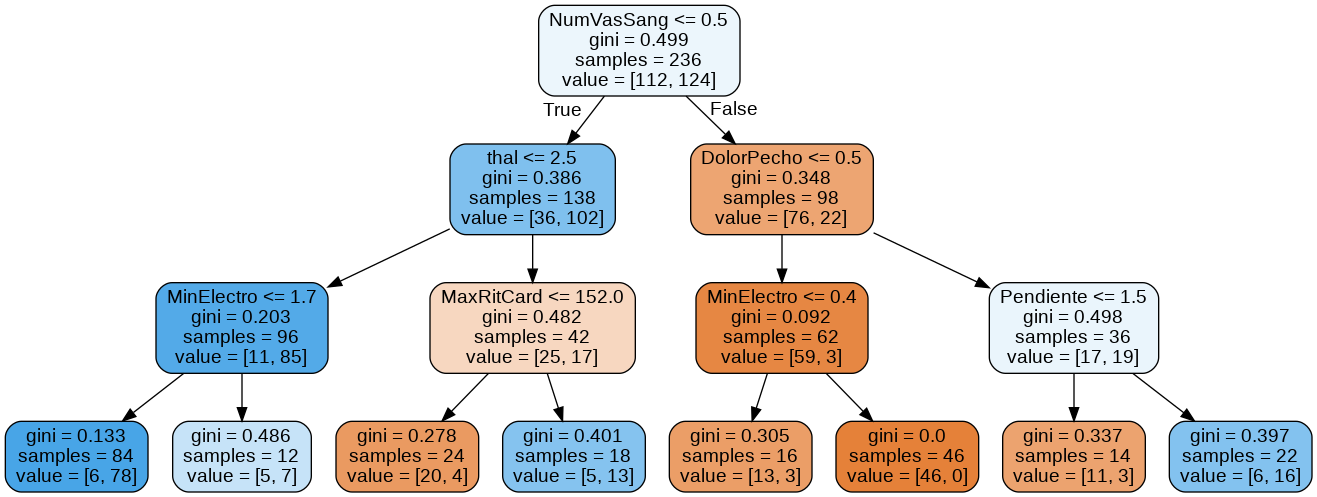

Si nos encontramos con el perfil de un paciente, es posible trazar un camino desde el nodo inicial hasta uno de los nodos finales que nos permitirá clasificar el diagnóstico del paciente.

El value en cada nodo nos dice a cuantos pacientes de ese sample tiene diagnóstico 0 y cuantos 1. Por ejemplo en el primer nodo terminal, value=[6,78] indica que a 6 de los 84 pacientes que caen en ese nodo no se les diagnóstico una enfermedad del corazón y a los otros 78 sí.

Si nos encontramos en un nodo final azul, el modelo determina que el paciente padece de una enfermedad del corazón, en cambio si es naranja, significa que no tiene enfermedad del corazón. Entre más intenso es el color, mayor es la probabilidad que el diagnóstico sea correcto.

El gini nos indica la pureza del nodo, un valor de 1 indica total desigualdad y 0 igualdad perfecta. En este caso, el sexto nodo final tiene un gini=0.0 lo que indica que a todos los pacientes que caen en ese nodo se les asignó el mismo diagnóstico.

#####Máquina de Soporte Vectorial

In [34]:
svm = SVC()
svm.fit(X_train, y_train)
predsvm = svm.predict(X_test)
print("SVM ALgorithm Train Accuracy: {:.2f}%".format(svm.score(X_train,y_train)*100))
print("SVM ALgorithm Test Accuracy: {:.2f}%".format(svm.score(X_test,y_test)*100))
predsvm

SVM ALgorithm Train Accuracy: 69.92%
SVM ALgorithm Test Accuracy: 61.67%


array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1])

Vemos que los accuracy scores son menores a 70% por lo que no podemos decir que este es un buen modelo. La clasificación óptima se realiza maximizando el margen de separación entre las clases. La baja precisión se puede deber a que no hay un margen claro entre los datos de los pacientes que tienen y no una enfermedad en el corazón. Trabajar este modelo pero omitiendo algunas variables podría mejorarlo, pero para este modelo no sabemos cuales son las que podríamos omitir.

Este modelo funciona mejor con grandes cantidades de registros, en este caso se está entrenando al modelo con 236 registros, lo que puede ser uno de los motivos por el cual este modelo no es muy útil para nuestro análisis.

#####Comparativa Matrices de Confusión

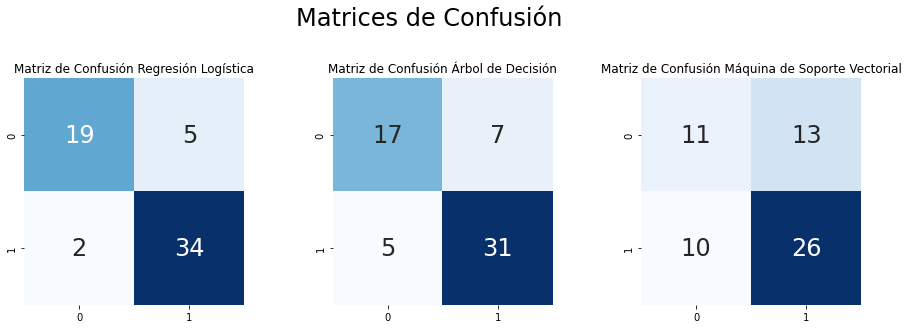

In [35]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,test_pred)
cm_dt = confusion_matrix(y_test,preds)
cm_svm = confusion_matrix(y_test,predsvm)

plt.figure(figsize=(15,10))

plt.suptitle("Matrices de Confusión",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Matriz de Confusión Regresión Logística")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Matriz de Confusión Árbol de Decisión")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Matriz de Confusión Máquina de Soporte Vectorial")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

Creamos la matriz de confusión para los tres modelos. Vemos que al utilizar la máquina de soporte vectorial hay más falsos negativos y falsos positivos a compración de los otros dos. La regresión logística es la que clasifica el diagnóstico con mayor precisión (ya que su matriz es la que tiene menos falsos negativos y falsos positivos) pero no significa que el árbol de decisión sea un mal modelo para resolver nuestro objetivo.

Elegimos de estos tres la regresión logística. Ya vimos que para estos datos es una regresión significativa y además es el modelo que clasifica los diagnósticos con mejor precisión. También es más facil observar la influencia de las variables, en este caso, NumVasSang y Sexo son las que tienen los coeficientes mas alejados de cero. Esto significa que estas variables tienen mayor influencia en el modelo.

####Conclusión

Haciendo uso del modelo de regresión logística, y debido a su alto porcentaje de precisión, se estableció que se puede predecir con una precisión de 88.33% la detección de una enfermedad del corazón en un paciente, logrando así el cumplimiento del objetivo principal establecido al inicio del proyecto. Siendo este la predicción de un diagnostico de alguna posible enfermedad del corazón en un paciente en base a las características obtenidas en los estudios clínicos realizados.

Se observa que las inferencias realizadas en la sección de Visualización respecto a la influencia de las variables en el diagnóstico y los resultados obtenidos bajo la técnica de minería apuntan a la misma dirección. Del correlograma obtuvimos que variables como Sexo y NumVasSang muestran alta correlación con el objetivo. Según los coeficientes del modelo seleccionado, estas también son las variables con mayor influencia. Por lo anterior, podemos decir que cumplimos con nuestros objetivos, tanto el principal como los secundarios.

Una técnica utilizada para la búsqueda de una mayor precisión en los modelos fue no usar ciertas variables, se aplicó esto para varias columnas de información, en especial para la regresión logística, dando como resultado una disminución en el porcentaje de precisión ya obtenido. No se hizo un análisis a todas las variables por lo que existe la posibilidad de una mejora con la eliminación de alguna variable no verificada por el equipo.

Respecto a trabajo a futuro, un problema que puede afectar los modelos de regresión y máquina de soporte vectorial es la multicolinealidad. Revisar que no exista multicolinealidad entre variables independientes en estos modelos y en caso de que exista removerlas del modelo puede mejorarlos.

#####Recursos
Regresión Logística


*   https://www.kaggle.com/azmainmorshed/logistic-regression-for-beginners
*   https://stackoverflow.com/questions/57924484/finding-coefficients-for-logistic-regression-in-python
*   https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r/


Árboles de Decisión



*   https://www.kaggle.com/sbsatter/decision-tree-on-uci-ml-heart-disease
*   https://www.kaggle.com/ashaabrizvi/logisticregression-v-decisiontree-v-randomforest#MODEL-BUILDING



Máquina de Soporte Vectorial



*   https://www.kaggle.com/caesarmario/heart-disease-prediction-w-various-ml-models




Otros Recursos



*   https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning